# Network Comparison by Language 

In [37]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

In [38]:
ANALYSIS_DIR = "./analysis_results"
os.makedirs(ANALYSIS_DIR, exist_ok=True)
OUTPUT_DIR = "./analysis_results/common"
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [39]:
def load_comparison_data(base_dir):
    all_metrics = []
    
    if not os.path.exists(base_dir):
        print(f"Directory {base_dir} does not exist.")
        return pd.DataFrame()

    for folder in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder)
        if os.path.isdir(folder_path):
            metrics_file = os.path.join(folder_path, "global_metrics.csv")
            if os.path.exists(metrics_file):
                try:
                    df = pd.read_csv(metrics_file)
                    # Ensure language column exists or use folder name
                    if 'language' not in df.columns:
                        df['language'] = folder
                    all_metrics.append(df)
                except Exception as e:
                    print(f"Error reading {metrics_file}: {e}")
    
    if all_metrics:
        return pd.concat(all_metrics, ignore_index=True)
    else:
        print("No global_metrics.csv files found.")
        return pd.DataFrame()

In [40]:
df_comparison = load_comparison_data(ANALYSIS_DIR)

if not df_comparison.empty:
    print("Loaded comparison data:")
    display(df_comparison)
else:
    print("No data to visualize.")

Loaded comparison data:


,language,nodes,edges,density,diameter,avg_degree,avg_strength,modularity,global_clustering
0,Germany_bluesky_posts,18,76,0.496732,2,8.444444,133.111111,0.171459,0.679245
1,Global_bluesky_posts,18,99,0.647059,3,11.000000,193.333333,0.222328,0.754768
2,Italy_bluesky_posts,17,44,0.323529,3,5.176471,64.941176,0.128538,0.453020
3,Portugal_bluesky_posts,18,82,0.535948,2,9.111111,193.222222,0.156463,0.656962
4,Spain_bluesky_posts,18,73,0.477124,3,8.111111,188.222222,0.151241,0.625592


In [41]:
def plot_comparison(df, metrics_to_plot):
    if df.empty:
        return
        
    # Set language as index for easier plotting if unique
    plot_df = df.set_index('language') if 'language' in df.columns else df
    
    for metric in metrics_to_plot:
        if metric not in plot_df.columns:
            print(f"Metric '{metric}' not found in data.")
            continue
            
        plt.figure(figsize=(10, 6))
        sns.barplot(x=plot_df.index, y=plot_df[metric], palette="viridis")
        plt.title(f"Comparison of {metric.replace('_', ' ').title()}", fontsize=16)
        plt.xlabel("Language / Dataset")
        plt.ylabel(metric.replace('_', ' ').title())
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(f"{OUTPUT_DIR}/comparison_{metric}.png")
        plt.show()

C:\Users\Oscar\AppData\Local\Temp\ipykernel_21944\1082387134.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_df.index, y=plot_df[metric], palette="viridis")


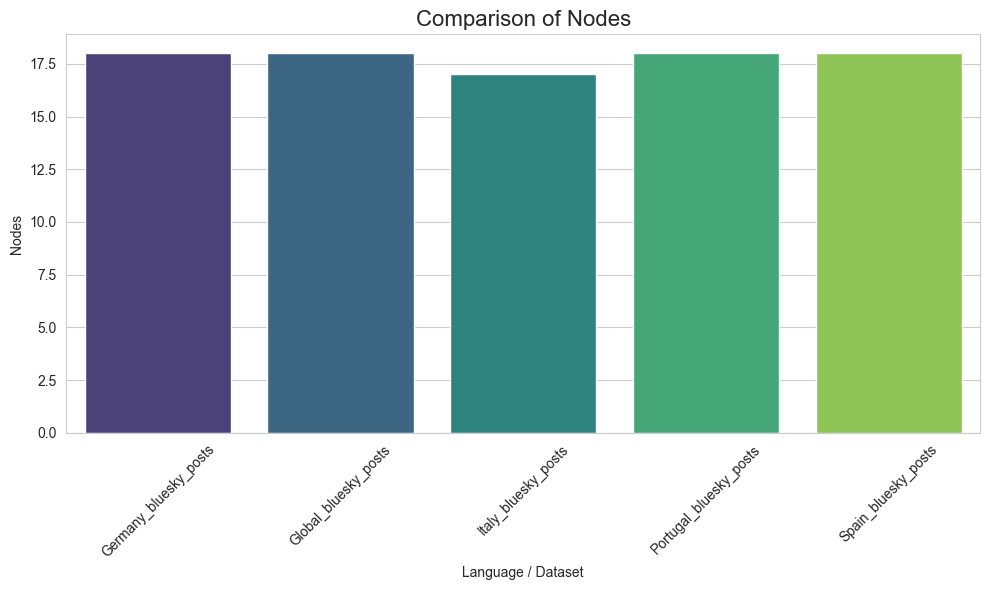

C:\Users\Oscar\AppData\Local\Temp\ipykernel_21944\1082387134.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_df.index, y=plot_df[metric], palette="viridis")


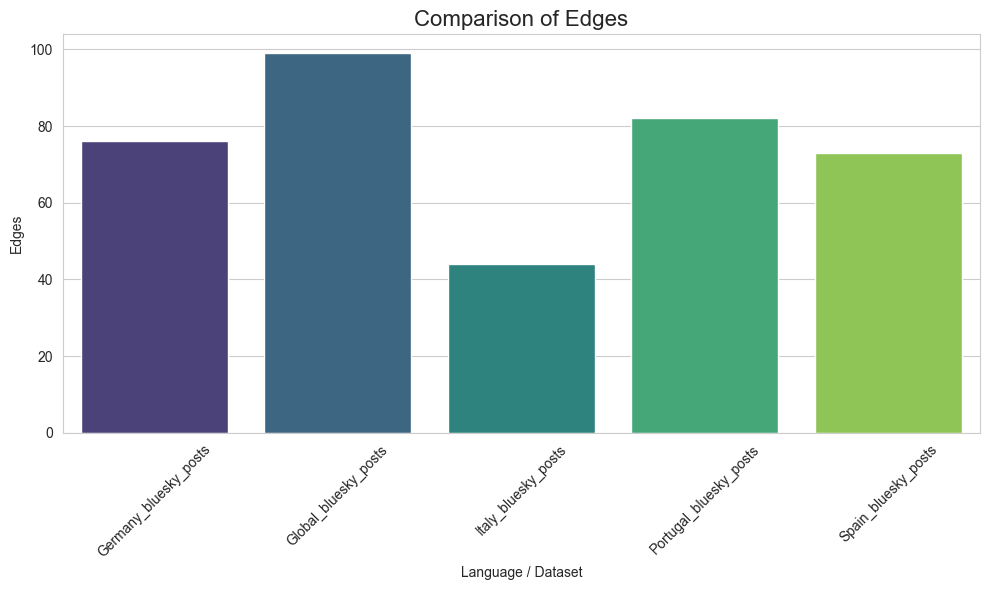

C:\Users\Oscar\AppData\Local\Temp\ipykernel_21944\1082387134.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_df.index, y=plot_df[metric], palette="viridis")


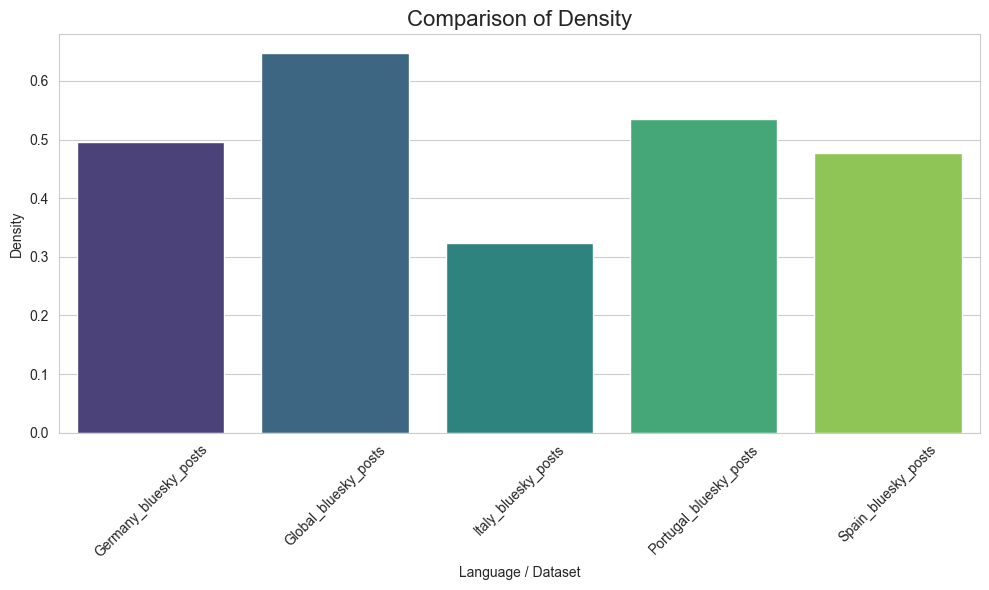

C:\Users\Oscar\AppData\Local\Temp\ipykernel_21944\1082387134.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_df.index, y=plot_df[metric], palette="viridis")


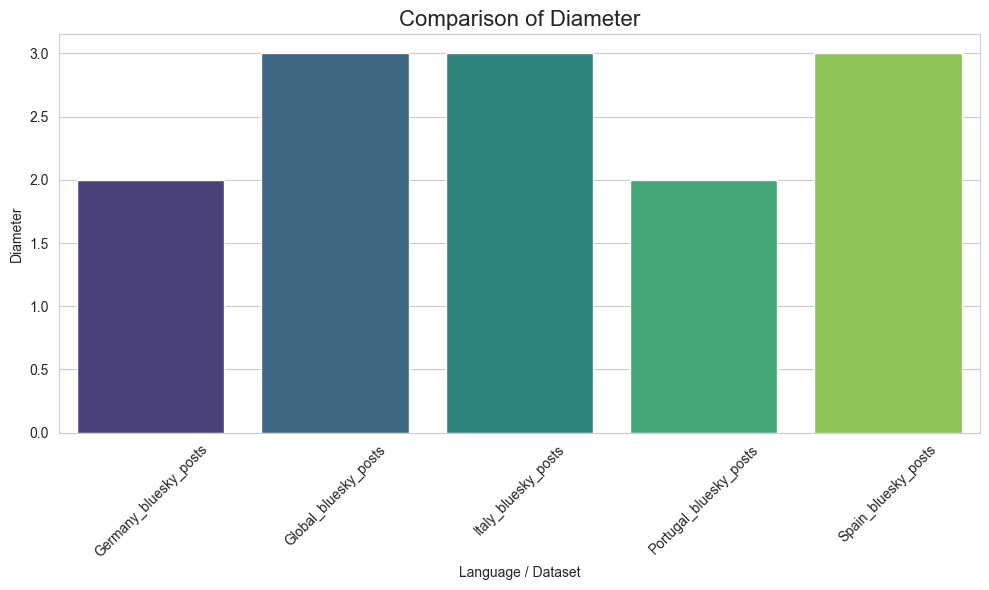

C:\Users\Oscar\AppData\Local\Temp\ipykernel_21944\1082387134.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_df.index, y=plot_df[metric], palette="viridis")


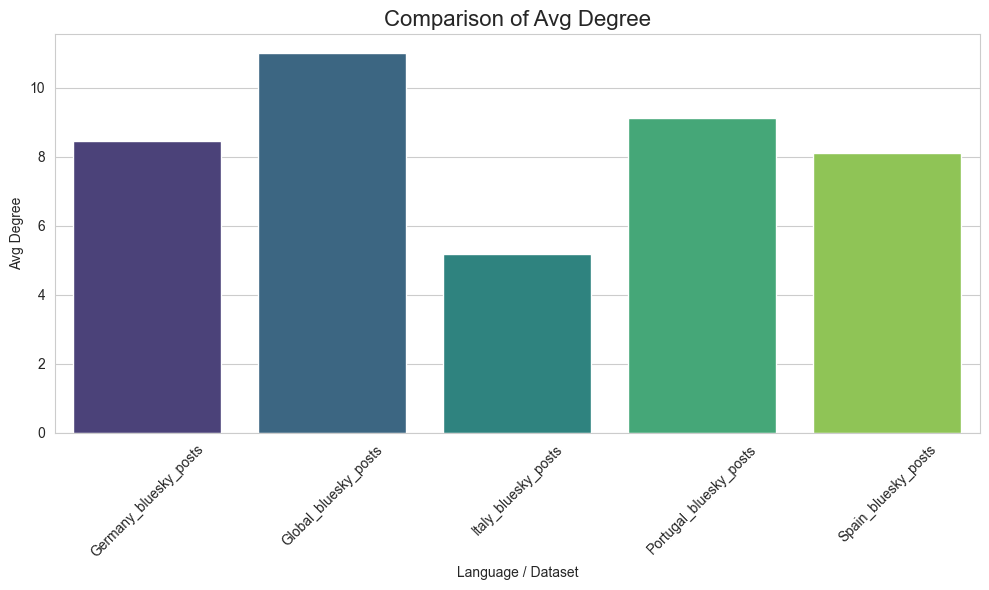

C:\Users\Oscar\AppData\Local\Temp\ipykernel_21944\1082387134.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_df.index, y=plot_df[metric], palette="viridis")


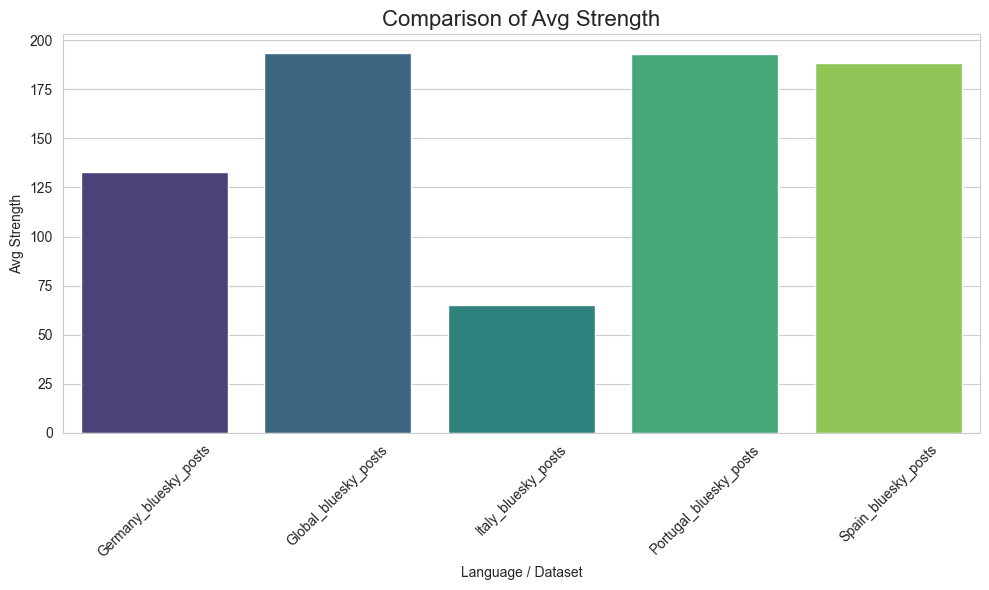

C:\Users\Oscar\AppData\Local\Temp\ipykernel_21944\1082387134.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_df.index, y=plot_df[metric], palette="viridis")


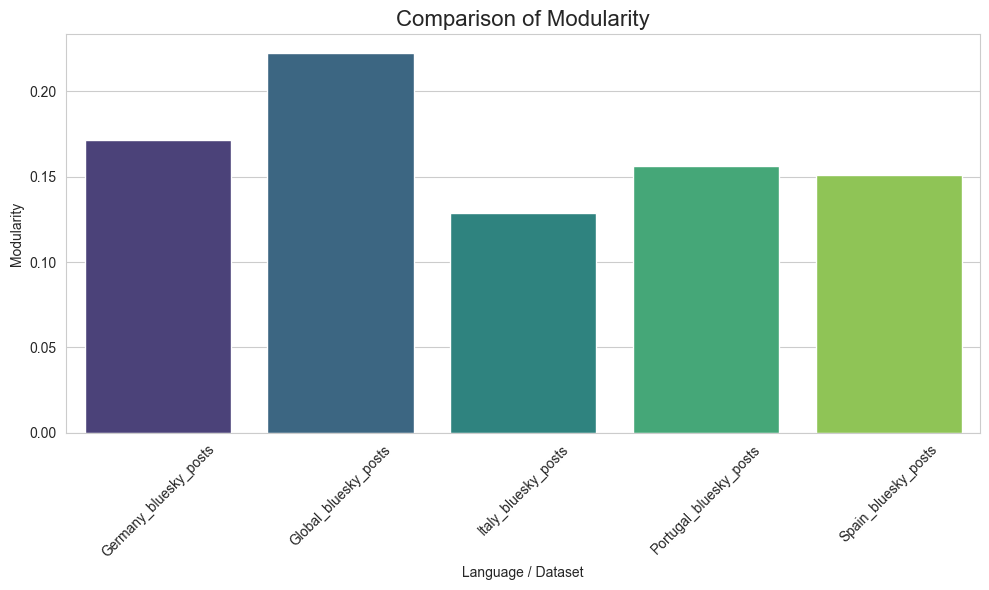

C:\Users\Oscar\AppData\Local\Temp\ipykernel_21944\1082387134.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_df.index, y=plot_df[metric], palette="viridis")


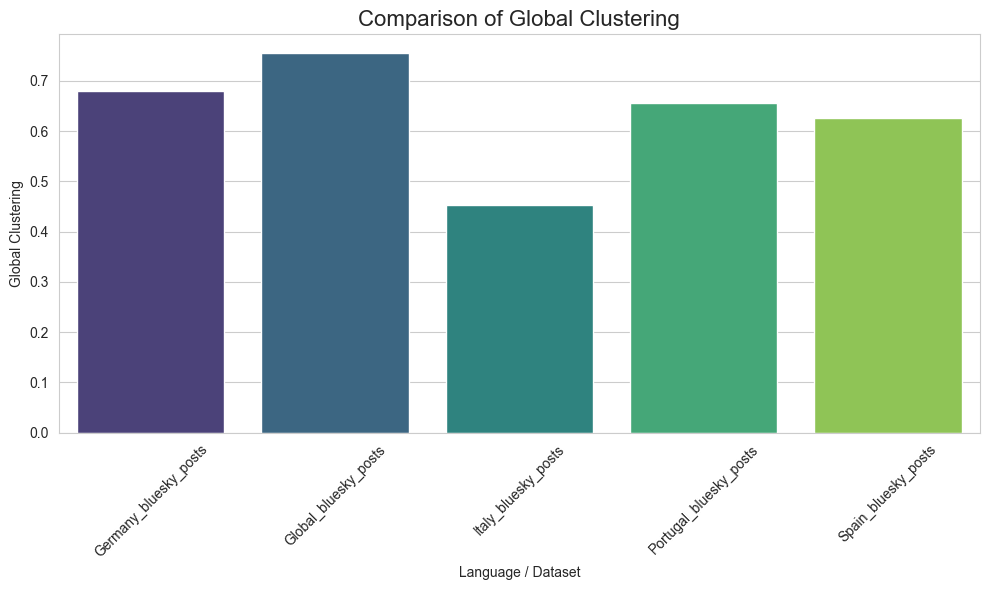

In [42]:
metrics = ['nodes', 'edges', 'density', 'diameter', 'avg_degree', 'avg_strength', 'modularity', 'global_clustering']
plot_comparison(df_comparison, metrics)